In [1]:
from astropy.io import fits
import numpy as np
import os
import matplotlib.pyplot as plt
from astropy.stats import SigmaClip
from photutils.background import Background2D, SExtractorBackground
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from scipy import ndimage
from scipy.ndimage import gaussian_filter
import little_things_functions as ltf
import cv2
from scipy.optimize import curve_fit
from matplotlib.patches import Ellipse
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from matplotlib.colors import Normalize
from matplotlib import cm
from scipy.fft import fft2, fftshift
import os
import numpy as np
from astropy.io import fits
from skimage.transform import AffineTransform, warp
import matplotlib.pyplot as plt
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import LogStretch
from scipy.ndimage import gaussian_filter
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# DDO 133

(779, 886)


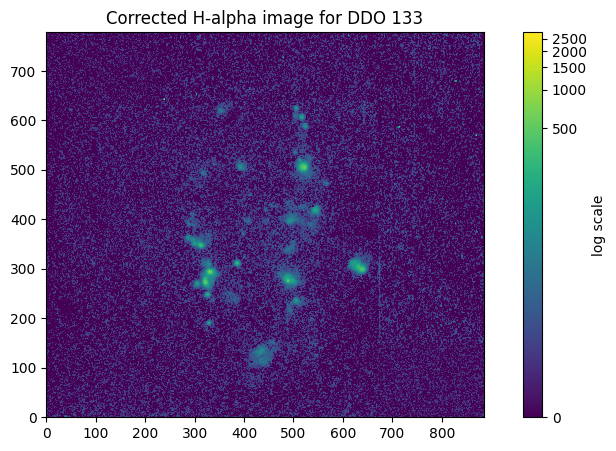

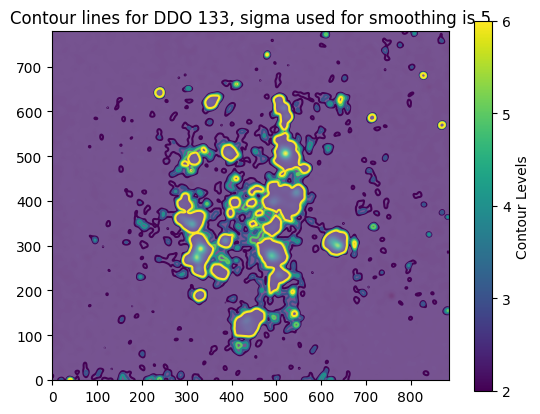

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import gaussian_filter
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from astropy.io import fits


# Load the data
galaxy_name = "DDO 133"
DDO133_H = ltf.open_fits(r"C:\Users\AYSAN\Desktop\project\Galaxy\Data\DDO 133\d133hmrms.fits")
DDO133_V = ltf.open_fits(r"C:\Users\AYSAN\Desktop\project\Galaxy\Starless images\d133\starless_backgroundless_d133v_aligned.fits.fit")
print(np.shape(DDO133_H))

# Generate the replacement values from a normal distribution
chunk = DDO133_H[100:120, 100:120]  # Example chunk to derive mean and std
mean = np.mean(chunk)
std_dev = np.std(chunk)

# Correctly size the replacement areas
replacement_area1 = np.random.normal(loc=mean, scale=std_dev, size=(DDO133_H.shape[0] - 630, 230))  # Adjusted size to match problem area
chunk2 = DDO133_H[150:170, 750:770]  # Example chunk to derive mean and std
mean2 = np.mean(chunk2)
std_dev2 = np.std(chunk2)
replacement_area2 = np.random.normal(loc=mean2, scale=std_dev2, size=(150, DDO133_H.shape[1] - 670))  # Adjusted size to match problem area

# Replace the problem areas in the original array
DDO133_H[630:, 0:230] = replacement_area1
DDO133_H[0:150, 670:] = replacement_area2

# Plot the corrected image
ltf.log_scale_plot(DDO133_H, f"Corrected H-alpha image for {galaxy_name}", "log scale")

# Define the smoothing sigma
sigma = 5

# Create the Gaussian smoothed image
smoothed = gaussian_filter(DDO133_H, sigma)

fig, ax = plt.subplots()
im = ax.imshow(smoothed, alpha=0.75, origin="lower")

# Create the contour plot
levels = [2, 3, 4, 5, 6]
CS = ax.contour(smoothed, levels, cmap='viridis')

# Create a custom color bar for the contour lines
norm = Normalize(vmin=2, vmax=6)  # Adjust this range according to your contour levels
sm = cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

# Add the color bar with labels
cbar = fig.colorbar(sm, ax=ax, ticks=levels)
cbar.ax.set_yticklabels([str(level) for level in levels])
cbar.set_label('Contour Levels')

plt.title(f"Contour lines for {galaxy_name}, sigma used for smoothing is {sigma}")
plt.show()

# Specify the output directory and file name
output_dir = r"C:\Users\AYSAN\Desktop\project\Galaxy\Code\d133"
output_path = os.path.join(output_dir, f"{galaxy_name}_replaced.fits")

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the replaced array to a new FITS file
fits.writeto(output_path, DDO133_H.astype(np.float32), overwrite=True)


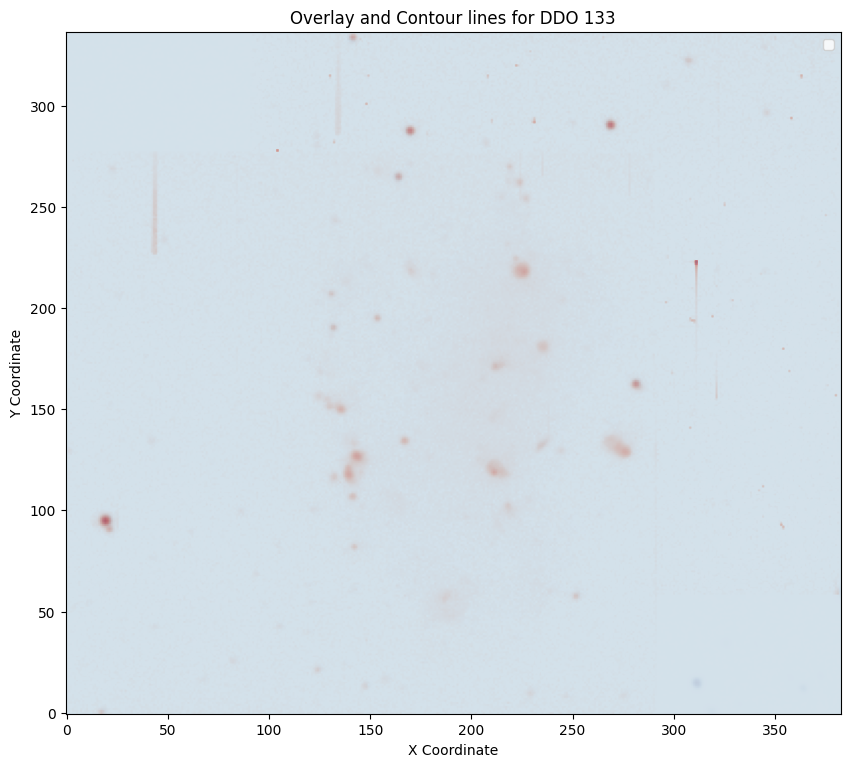

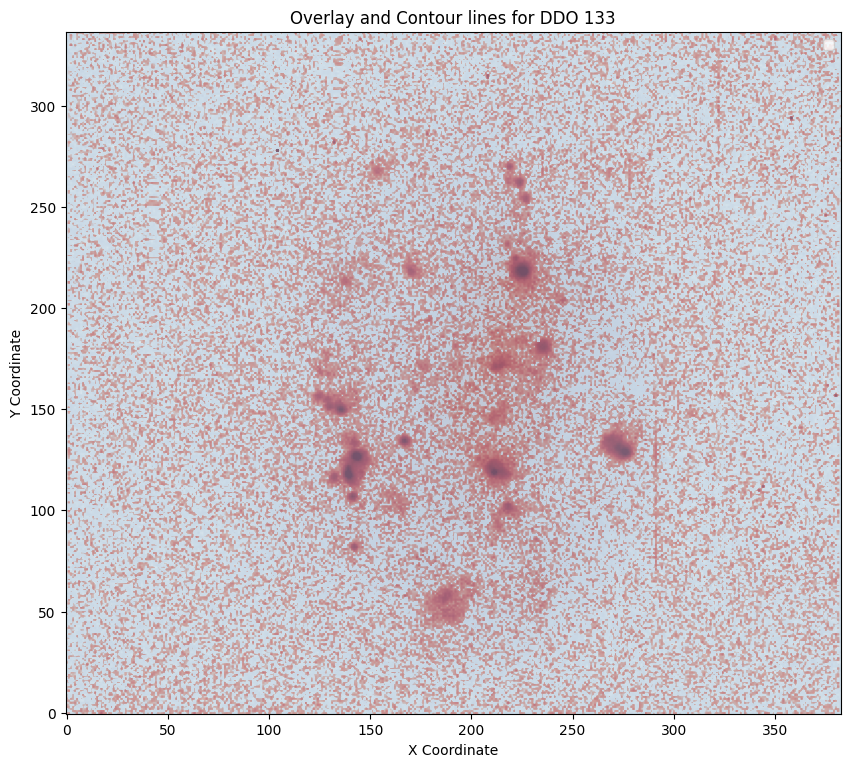

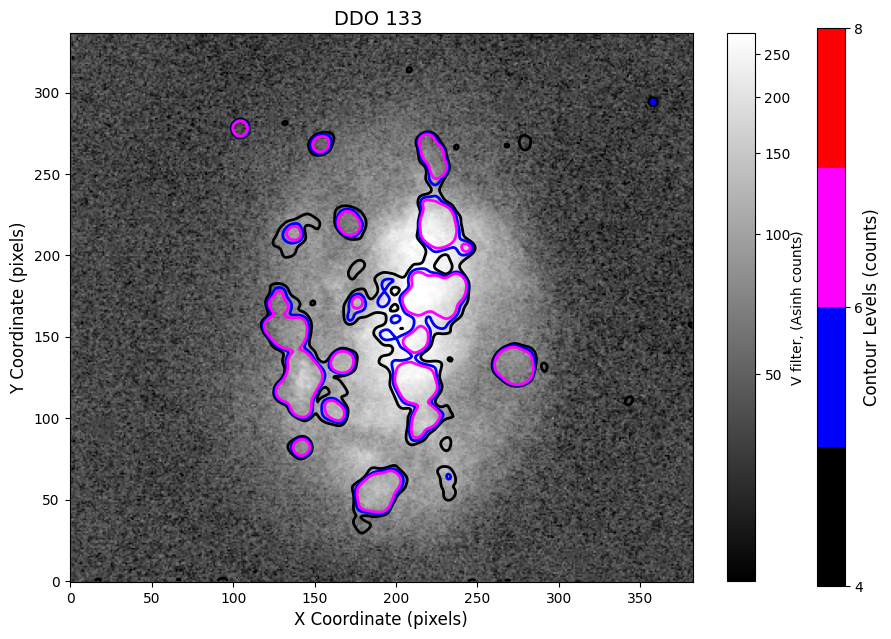

H-alpha pixelscale: 0.48931099613818585


In [22]:
image1_path = r"C:\Users\AYSAN\Desktop\project\Galaxy\Data\DDO 133\d133v.fits"
image2_path = r"C:\Users\AYSAN\Desktop\project\Galaxy\Data\DDO 133\d133ha.fits"
output_dir = r"C:\Users\AYSAN\Desktop\project\Galaxy\Code\d133"
star_coords_V = np.array([[456,607], [357,604], [229,451]])
star_coords_H = np.array([[622,673], [392,666], [96,312]])

V_with_stars, H_with_stars = ltf.V_and_Halpha_alignment(galaxy_name, image1_path, image2_path, star_coords_V, star_coords_H, output_dir, alpha1=0.5, alpha2=0.5)


image1_path = r"C:\Users\AYSAN\Desktop\project\Galaxy\Starless images\d133\starless_backgroundless_d133v_aligned.fits.fit"
image2_path = r"C:\Users\AYSAN\Desktop\project\Galaxy\Code\d133\DDO 133_replaced.fits"
V_pixelscale = 1.134
V_image , H_image = ltf.V_and_Halpha_alignment(galaxy_name, image1_path, image2_path, star_coords_V, star_coords_H, output_dir, alpha1=0.5, alpha2=0.5)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, ListedColormap
from scipy.ndimage import gaussian_filter
from astropy.visualization import AsinhStretch, ImageNormalize, PercentileInterval

def enhance_contrast(image, stretch=AsinhStretch(), interval=PercentileInterval(99.5)):
    norm = ImageNormalize(image, interval=interval, stretch=stretch)
    return norm

def plot_contours_V_and_Halpha(galaxy_name, V_image, H_image, folder_path, alpha=1, sigma=5, contour_levels=[4, 6, 8, 10]):
    # Enhance contrast
    norm_V = enhance_contrast(V_image)

    # Define colors for contours
    contour_colors = ['black', 'blue', 'magenta', 'red']

    # Plot the V filter image with enhanced contrast
    fig, ax = plt.subplots(figsize=(10, 10))
    im1 = ax.imshow(V_image, cmap='gray', alpha=alpha, norm=norm_V, origin="lower")

    # Create the Gaussian smoothed image for contours
    smoothed = gaussian_filter(H_image, sigma=sigma)

    # Add contours of the smoothed image with specific colors and line styles
    for i, level in enumerate(contour_levels):
        ax.contour(smoothed, levels=[level], colors=contour_colors[i], linestyles='solid', linewidths=2)

    # Create a custom color bar with lines
    cmap = ListedColormap(contour_colors)
    norm = Normalize(vmin=min(contour_levels), vmax=max(contour_levels))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    # Add the color bar with labels
    cbar_contour = fig.colorbar(sm, ax=ax, ticks=contour_levels, fraction=0.036, pad=0.08)
    

    cbar_contour.set_label('Contour Levels (counts)', labelpad=0, fontsize=12)

    # Add colorbar for the V filter image
    cbar1 = fig.colorbar(im1, ax=ax, fraction=0.04, pad=0.05
                         )
    cbar1.set_label("V filter, (Asinh counts)", labelpad=0, fontsize=10)

    # Set larger font sizes for titles and labels
    ax.set_title(f"{galaxy_name} ", fontsize=14)
    ax.set_xlabel('X Coordinate (pixels)', fontsize=12)
    ax.set_ylabel('Y Coordinate (pixels)', fontsize=12)

    # Save the figure to the specified path
    output_path = f"{folder_path}\\{galaxy_name} H-alpha regions.png"
    plt.savefig(output_path, bbox_inches='tight', dpi=300)

    plt.show()

plot_contours_V_and_Halpha(galaxy_name, V_image, H_image, folder_path=r"C:\Users\AYSAN\Desktop\project\Galaxy\H-alpha regions", alpha=1, sigma=3, contour_levels=[4,6,8])
H_pixelscale = ltf.calculate_pixelscale(star_coords_V, star_coords_H, V_pixelscale)
print("H-alpha pixelscale:", H_pixelscale)

# Resolution DDO 133

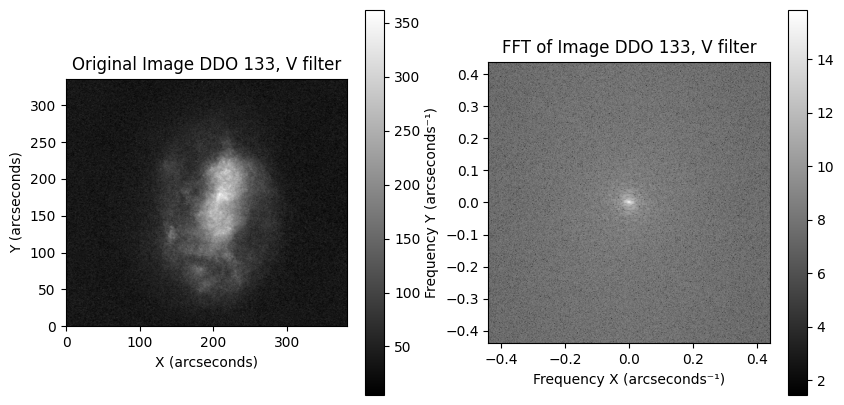

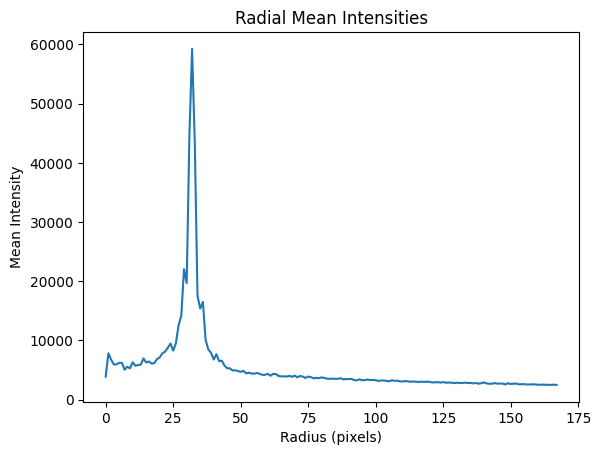

In [4]:
#ltf.resolution_profiles(H_image, V_image, galaxy_name, V_pixelscale, r"C:\Users\AYSAN\Desktop\project\Galaxy\Resolution")
def resolution(image, name, filter, num_theta, pixelscale):
    fft_image_shifted = ltf.compute_fft(image)
    ltf.plot_image_and_fft(image, fft_image_shifted, name, filter, pixelscale=pixelscale)
    length = int(np.min(fft_image_shifted.shape) / 2)
    center = np.array(fft_image_shifted.shape) // 2

    # Create a grid of coordinates
    y, x = np.ogrid[:fft_image_shifted.shape[0], :fft_image_shifted.shape[1]]
    y = y - center[1]
    x = x - center[0]
    
    # Calculate the radial distance of each point from the center
    distance = np.sqrt(x**2 + y**2)

    # Initialize an array to store the mean values for each radius
    radial_means = np.zeros(length)
    
    # Loop over each radius and compute the mean value
    for r in range(length):
        mask = (distance >= r) & (distance < r + 1)
        radial_means[r] = np.mean(np.abs(fft_image_shifted[mask]))

    return radial_means, length
radial_means, length = resolution(V_image, "DDO 133", "V", 360, V_pixelscale)
plt.plot(radial_means)
plt.xlabel('Radius (pixels)')
plt.ylabel('Mean Intensity')
plt.title('Radial Mean Intensities')
plt.show()
